# Examples
> Some examples on working with p4tools

In [ ]:
import p4tools as p4t

In [ ]:
import numpy as np

import pandas as pd
from p4tools.io import (
    get_blotch_catalog,
    get_blotches_for_tile,
    get_fan_catalog,
    get_fans_for_tile,
    get_region_names,
)

In [ ]:
rois = get_region_names()

In [ ]:
rois.roi_name.unique()

array(['Macclesfield', 'unknown', 'Starburst', 'Manhattan_Classic',
       'Wellington', 'Albany', 'Bilbao', 'Ithaca', 'Portsmouth', 'Pisaq',
       'Manhattan_Frontinella', 'BuenosAires', 'Inca_City_Ridges',
       'Inca_City', 'Giza', 'Potsdam', 'Troy', 'Oswego_Edge', 'Halifax',
       'Caterpillar', 'Rochester', 'Manhattan_Cracks', 'Schenectady',
       'Binghamton', 'Atka', 'Cortland', 'Geneseo', 'Manhattan2'],
      dtype=object)

In [ ]:
rois.query("roi_name=='Giza'").describe()

,lat_IND,lon_IND,minimal_distance,lat_WORD,lon_WORD,MY
count,35.000000,35.000000,35.000000,3.500000e+01,3.500000e+01,35.000000
mean,-84.829069,66.071666,6.318094,-8.482000e+01,6.570000e+01,29.057143
std,0.066423,0.991527,11.242504,2.883665e-14,1.441832e-14,1.027357
min,-84.979100,65.637800,0.720371,-8.482000e+01,6.570000e+01,28.000000
25%,-84.834950,65.736450,1.254355,-8.482000e+01,6.570000e+01,28.000000
50%,-84.812200,65.774200,1.487853,-8.482000e+01,6.570000e+01,29.000000
75%,-84.809350,65.799750,4.005964,-8.482000e+01,6.570000e+01,30.000000
max,-84.581900,69.890400,44.631912,-8.482000e+01,6.570000e+01,31.000000


In [ ]:
fans = get_fan_catalog()

In [ ]:
blotches = get_blotch_catalog()

In [ ]:
fansperobsid = fans.groupby('obsid').size()

In [ ]:
blotchesperobsid = blotches.groupby('obsid').size()

In [ ]:
df = fansperobsid.to_frame()

In [ ]:
df['blotches counts'] = blotchesperobsid

In [ ]:
df.columns = ["fan_count", "blotch_count"]

In [ ]:
fan_counts = fans.groupby('tile_id').size()

In [ ]:
blotch_counts = blotches.groupby('tile_id').size()

In [ ]:
fan_counts

tile_id
APF0000001    3
APF0000006    4
APF0000009    1
APF000000b    1
APF000000c    4
             ..
APF0000x3f    1
APF0000x3j    1
APF0000x3k    1
APF0000x3n    1
APF0000x3r    1
Length: 18665, dtype: int64

In [ ]:
18/18665

0.0009643718189124028

In [ ]:
blotch_counts

tile_id
APF0000001    1
APF0000002    2
APF0000004    4
APF0000005    5
APF0000006    7
             ..
APF0000x3d    3
APF0000x3g    1
APF0000x3h    3
APF0000x3m    2
APF0000x3s    2
Length: 24629, dtype: int64

In [ ]:
blotch_counts[blotch_counts>100]

tile_id
APF000018t    104
APF00006nd    120
APF00006o6    112
APF00007gg    104
APF00007gi    162
             ... 
APF0000jhl    124
APF0000q2t    172
APF0000q3a    156
APF0000q3x    146
APF0000q44    212
Length: 414, dtype: int64

In [ ]:
merged = fan_counts + blotch_counts

In [ ]:
blotch_counts.loc['APF0000006']

7

In [ ]:
fan_counts.loc['APF0000006']

4

In [ ]:
merged

tile_id
APF0000001     4.0
APF0000002     NaN
APF0000004     NaN
APF0000005     NaN
APF0000006    11.0
              ... 
APF0000x3k     NaN
APF0000x3m     NaN
APF0000x3n     NaN
APF0000x3r     NaN
APF0000x3s     NaN
Length: 30211, dtype: float64

In [ ]:
merged[merged > 100].shape

(54,)

In [ ]:
fan_counts.loc['APF000000c']

4

In [ ]:
merged.loc['APF000000c']

7.0

In [ ]:
merged.loc['APF00007gi']

nan

In [ ]:
fan_counts.name = 'fans'

In [ ]:
blotch_counts.name = 'blotches'

In [ ]:
df = pd.DataFrame(fan_counts)

In [ ]:
df['blotches'] = blotch_counts

In [ ]:
df

,fans,blotches
tile_id,,
APF0000001,3,1.0
APF0000006,4,7.0
APF0000009,1,26.0
APF000000b,1,3.0
APF000000c,4,3.0
...,...,...
APF0000x3f,1,NaN
APF0000x3j,1,NaN
APF0000x3k,1,NaN


In [ ]:
df[(df.fans + df.blotches) > 100]

,fans,blotches
tile_id,,
APF00002zj,99,4.0
APF00006mg,98,7.0
APF00006mt,118,2.0
APF00006mv,95,19.0
APF00006n0,43,58.0
APF00006n2,78,37.0
APF00006n6,108,3.0
APF00006n9,105,3.0
APF00006nm,68,33.0


In [ ]:
merged = fan_counts.combine(blotch_counts, np.add, 0)

In [ ]:
merged[merged>100]

tile_id
APF000018t    104
APF00002zj    103
APF00006mg    105
APF00006mr    167
APF00006mt    120
             ... 
APF0000q3m    114
APF0000q3v    116
APF0000q3x    280
APF0000q44    215
APF0000q45    102
Length: 458, dtype: int64

In [ ]:
merged

tile_id
APF0000001     4
APF0000002     2
APF0000004     4
APF0000005     5
APF0000006    11
              ..
APF0000x3k     1
APF0000x3m     2
APF0000x3n     1
APF0000x3r     1
APF0000x3s     2
Length: 30211, dtype: int64

In [ ]:
buffalo = "ESP_011486_0980_COLOR ESP_011987_0975_COLOR ESP_012198_0975_COLOR ESP_012277_0975_COLOR ESP_012620_0975_COLOR".split()

In [ ]:
buffalo = [i.rstrip("_COLOR") for i in buffalo]

In [ ]:
p4_buffalo = fans[fans.obsid.isin(buffalo)].obsid.unique()

In [ ]:
fans[fans.obsid.isin(p4_buffalo)].groupby("obsid").size()

obsid
ESP_011486_0980    242
ESP_012277_0975     19
ESP_012620_0975     30
dtype: int64

In [ ]:
fans[fans.obsid.isin(p4_buffalo)][["l_s", "obsid"]].drop_duplicates()

,l_s,obsid
124564,241.144,ESP_012620_0975
136301,187.254,ESP_011486_0980
139964,224.333,ESP_012277_0975


In [ ]:
fans[fans.tile_id.str.contains("r8y")]

,marking_id,angle,distance,tile_id,image_x,image_y,n_votes,obsid,spread,version,...,y_angle,l_s,map_scale,north_azimuth,BodyFixedCoordinateX,BodyFixedCoordinateY,BodyFixedCoordinateZ,PlanetocentricLatitude,PlanetographicLatitude,Longitude
154795,F02a9f2,34.16,171.27,APF0000r8y,505.45,13038.68,19,ESP_020242_0945,41.85,1,...,0.56,184.557,1.0,143.674895,-63.560715,265.134952,-3370.241784,-85.374934,-85.428989,103.481087
154796,F02a9f3,38.19,86.92,APF0000r8y,387.19,12617.75,16,ESP_020242_0945,33.44,1,...,0.62,184.557,1.0,143.674895,-63.930749,264.887663,-3370.271982,-85.377575,-85.431599,103.568870
154797,F02a9f4,36.11,106.09,APF0000r8y,30.86,13128.72,18,ESP_020242_0945,36.90,1,...,0.59,184.557,1.0,143.674895,-63.883825,265.528290,-3370.208031,-85.367154,-85.421299,103.527769
154798,F02a9f5,76.52,63.91,APF0000r8y,32.33,13128.33,3,ESP_020242_0945,46.96,1,...,0.96,184.557,1.0,143.674895,-63.882893,265.526982,-3370.208168,-85.367179,-85.421324,103.527643
154799,F02a9f6,33.30,90.38,APF0000r8y,249.21,12781.71,14,ESP_020242_0945,25.57,1,...,0.55,184.557,1.0,143.674895,-63.935125,265.109183,-3370.249450,-85.373890,-85.427956,103.558845
154800,F02a9f7,32.72,77.35,APF0000r8y,204.00,13205.53,15,ESP_020242_0945,36.85,1,...,0.54,184.557,1.0,143.674895,-63.694249,265.469837,-3370.212149,-85.368868,-85.422993,103.491955
154801,F02a9f8,39.19,54.32,APF0000r8y,73.62,13114.42,12,ESP_020242_0945,30.04,1,...,0.63,184.557,1.0,143.674895,-63.858677,265.487992,-3370.211967,-85.367920,-85.422056,103.524616


In [ ]:
from p4tools.plotting import plot_blotches_for_tile, plot_fans_for_tile

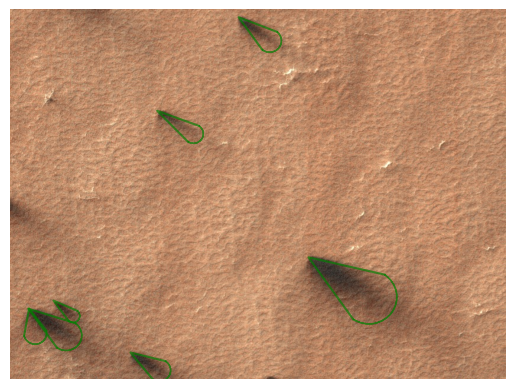

In [ ]:
plot_fans_for_tile("APF0000r8y")

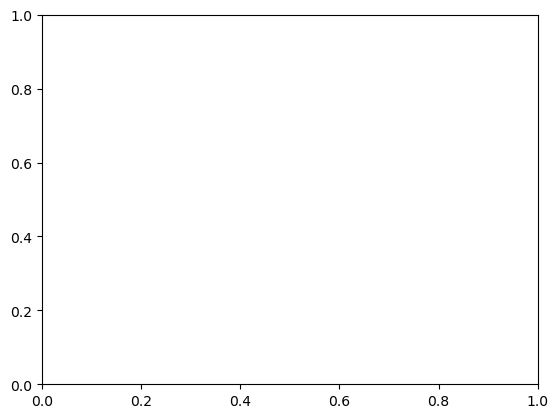

In [ ]:
plot_blotches_for_tile("APF0000r8y")

In [ ]:
get_fans_for_tile("5br")

,marking_id,angle,distance,tile_id,image_x,image_y,n_votes,obsid,spread,version,...,y_angle,l_s,map_scale,north_azimuth,BodyFixedCoordinateX,BodyFixedCoordinateY,BodyFixedCoordinateZ,PlanetocentricLatitude,PlanetographicLatitude,Longitude


In [ ]:
get_blotches_for_tile("5g")

,marking_id,angle,tile_id,image_x,image_y,n_votes,obsid,radius_1,radius_2,vote_ratio,...,y_angle,l_s,map_scale,north_azimuth,BodyFixedCoordinateX,BodyFixedCoordinateY,BodyFixedCoordinateZ,PlanetocentricLatitude,PlanetographicLatitude,Longitude
